In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from collections import defaultdict


In [25]:
# Helper methods
def plot_histogram(ydata, x_labels = [0.01, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], title = 'Generic Title', x_label= 'x_label', y_label='y_label'):
    plt.gcf().clear()
    plt.hist(ydata, bins=x_labels, ec='black')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()   

def plot_distribution(ydata,xdata=None, title='Generic Distribution', x_label='Generic', y_label='Generic'):
    plt.gcf().clear()
    if xdata is None:
        plt.plot(ydata)
    else:
        plt.plot(xdata,ydata) 
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()   

In [3]:
Ratings = pd.read_csv('ml-latest-small/ratings.csv')


In [4]:
Ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
# For the subsequent discussion,
# we assume that the ratings matrix is denoted by R, and it is an m  n matrix
# containing m users (rows) and n movies (columns).

R_df = Ratings.pivot_table('rating', 'userId', 'movieId', fill_value=0)


In [6]:
R_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0


In [7]:
# Question 1: Compute the sparsity of the movie rating dataset, where spar-
# sity is defined by equation 1

# total available rating = 10004, total possible rating = R(len) * R(width)

total_available_rating = len(Ratings) # = 10004
total_possible_ratings =np.prod(R_df.shape)

sparsity = total_available_rating / total_possible_ratings

print('Question 1: Sparsity =', sparsity)

Question 1: Sparsity = 0.0164391416087


In [8]:
# Question 2: Plot a histogram showing the frequency of the rating values. To
# be specific, bin the rating values into intervals of width 0.5 and use the binned
# rating values as the horizontal axis. Count the number of entries in the ratings
# matrix R with rating values in the binned intervals and use this count as the
# vertical axis. Briely comment on the shape of the histogram


In [9]:
Ratings.rating.unique()

array([ 2.5,  3. ,  2. ,  4. ,  3.5,  1. ,  5. ,  4.5,  1.5,  0.5])

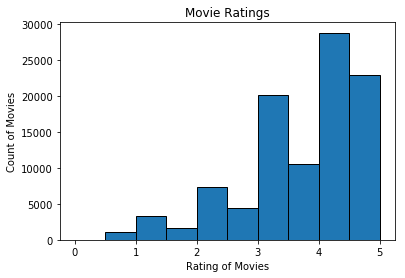

In [10]:
plot_histogram(ydata = Ratings.rating, title='Movie Ratings', x_label='Rating of Movies', y_label='Count of Movies')

In [11]:
# Question 3: Plot the distribution of ratings among movies. To be specific,
# the X-axis should be the movie index ordered by decreasing frequency and the
# Y -axis should be the number of ratings the movie has received.

In [12]:
movies = np.sum(R_df!=0, axis=0) # we need to do R_df!=0 to not consider users not giving rating to a movie
movie_sorted = movies.sort_values(ascending=False)

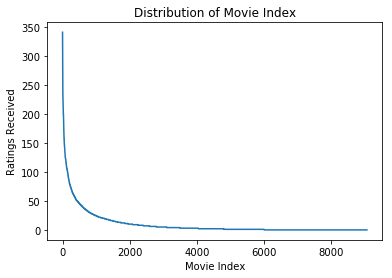

In [13]:
plot_distribution(ydata=list(movie_sorted), title='Distribution of Movie Index', x_label='Movie Index', y_label='Ratings Received')

In [14]:
# Question 4: Plot the distribution of ratings among users. To be specifc, the
# X-axis should be the user index ordered by decreasing frequency and the Y -axis
# should be the number of movies the user have rated.

In [15]:
users = np.sum(R_df!=0, axis=1) # we need to do R_df!=0 to not consider users not giving rating to a movie
user_sorted = users.sort_values(ascending=False)

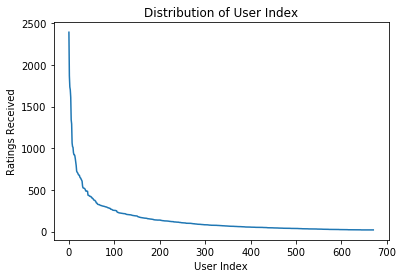

In [16]:
plot_distribution(ydata=list(user_sorted), title='Distribution of User Index', x_label='User Index', y_label='Ratings Received')

In [17]:
# Question 5: Explain the salient features of the distribution found in question 3
# and their implications for the recommendation process.

In [18]:
# Question 6: Compute the variance of the rating values received by each movie.
# Then, bin the variance values into intervals of width 0.5 and use the binned vari-
# ance values as the horizontal axis. Count the number of movies with variance
# values in the binned intervals and use this count as the vertical axis. Briely
# comment on the shape of the histogram

In [19]:
R_df_na = Ratings.pivot_table('rating', 'userId', 'movieId') # no rating as nan
var_movie = np.var(R_df_na,axis=0)

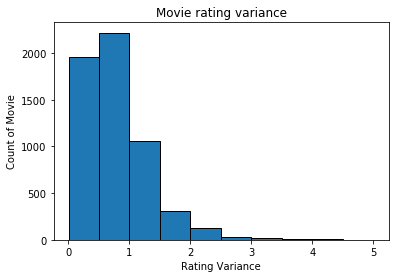

In [20]:
plot_histogram(ydata = var_movie, title="Movie rating variance", x_label="Rating Variance",y_label="Count of Movie" )

In [21]:
# Question 7: Write down the formula for u in terms of Iu and ruk

In [22]:
# Question 8: In plain words, explain the meaning of Iu \ Iv. Can Iu \ Iv = ;

In [ ]:
# Question 9: Can you explain the reason behind mean-centering the raw rat-
# ings (rvj 􀀀 v) in the prediction function? (Hint: Consider users who either
# rate all items highly or rate all items poorly and the impact of these users on
# the prediction function)

In [ ]:
# Question 10: Design a k-NN collaborative filter to predict the ratings of the

In [81]:
from sklearn.neighbors import KNeighborsClassifier
import nltk
from sklearn import cross_validation

from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn import utils


In [46]:
Ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [92]:
# # creating training and target.
# X = np.array(Ratings.ix[:, ['userId','movieId']])
# y = np.array(Ratings['rating'])

# # since we cannot pass in float values in rating into kNN, we need to encode it
# le = preprocessing.LabelEncoder()
# y_encoded= le.fit_transform(y)


In [94]:
# # split into train and test dataset.
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33,random_state=42 )

In [141]:
# RMSE = []
# MAE = []
# ks = np.arange(2,102,2)

# for i in range(2,102,2): # watchout, range in python won't account for end number
#     knn = KNeighborsClassifier(n_neighbors=i)
#     #i guess they renamed it from mean_squared_error, same with mean_squared_error
#     # scikit learn return the negative value for MSE
#     rmse_scores = -1 * cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
#     mae_scores = -1 * cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
#     RMSE.append(rmse_scores.mean())
#     MAE.append(mae_scores.mean())
    

In [158]:
# #position where min RMSE
# print([i for i, x in enumerate(RMSE) if x == min(RMSE)])
# ks[44]

[44]


90

In [161]:
# #position where min MAE
# print([i for i, x in enumerate(MAE) if x == min(MAE)])
# ks[44]

In [162]:
# plot_distribution(RMSE, ks, title="RMSE distribution", x_label="k", y_label="Average RMSE")

In [163]:
# plot_distribution(MAE, ks, title="MAE distribution", x_label="k", y_label="Average MAE")

In [8]:
from surprise.model_selection.validation  import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans

import os
from surprise import Dataset
from surprise import Reader
from surprise import accuracy

In [10]:
# In order to fit surprise
file_path = os.path.expanduser('ml-latest-small/ratings.csv')
reader = Reader(line_format='user item rating', sep=',',skip_lines=1, rating_scale=(0.5, 5))
data = Dataset.load_from_file(file_path, reader=reader)

In [16]:
%%capture
RMSE = []
MAE = []
ks = np.arange(2,102,2)

for k in range(2,102,2):
    knn = KNNWithMeans(k=k, sim_options = {'name': 'pearson'})
    cv = cross_validate(knn, data, measures=['RMSE','MAE'],cv=10, verbose=False)
    RMSE.append(np.mean(cv['test_rmse']))
    MAE.append(np.mean(cv['test_mae']))
                

In [33]:
#position where min RMSE
print([i for i, x in enumerate(RMSE) if x == min(RMSE)])
print(min(RMSE))
ks[23]

[23]
0.916844240184


48

In [34]:
#position where min MAE
print([i for i, x in enumerate(MAE) if x == min(MAE)])
print(min(MAE))
ks[38]

[38]
0.698715204602


78

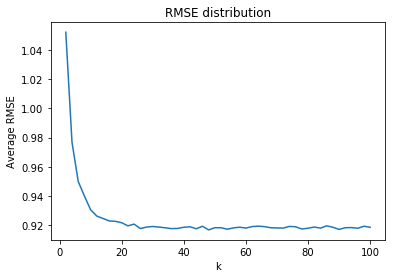

In [26]:
plot_distribution(RMSE, ks, title="RMSE distribution", x_label="k", y_label="Average RMSE")

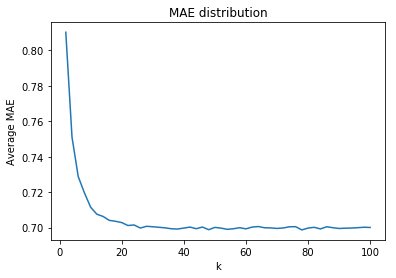

In [35]:
plot_distribution(MAE, ks, title="MAE distribution", x_label="k", y_label="Average MAE")

In [ ]:
# Question 11: Use the plot from question 10, to nd a 'minimum k'. Note: The
# term 'minimum k' in this context means that increasing k above the minimum
# value would not result in a signicant decrease in average RMSE or average
# MAE. If you get the plot correct, then 'minimum k' would correspond to the
# k value for which average RMSE and average MAE converges to a steady-state
# value. Please report the steady state values of average RMSE and average MAE

In [ ]:
# Question 12: Design a k-NN collaborative lter to predict the ratings of the
# movies in the popular movie trimmed test set and evaluate it's performance
# using 10-fold cross validation.Sweep k ( number of neighbors) from 2 to 100 in
# step sizes of 2, and for each k compute the average RMSE obtained by averaging
# the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis).
# Also, report the minimum average RMSE

In [ ]:
# Question 13: Design a k-NN collaborative lter to predict the ratings of the
# movies in the unpopular movie trimmed test set and evaluate it's performance
# using 10-fold cross validation.Sweep k ( number of neighbors) from 2 to 100 in
# step sizes of 2, and for each k compute the average RMSE obtained by averaging
# the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis).
# Also, report the minimum average RMSE

In [ ]:
# Question 14: Design a k-NN collaborative lter to predict the ratings of the
# movies in the high variance movie trimmed test set and evaluate it's perfor-
# mance using 10-fold cross validation.Sweep k ( number of neighbors) from 2 to
# 100 in step sizes of 2, and for each k compute the average RMSE obtained by
# averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k
# (X-axis). Also, report the minimum average RMSE

In [ ]:
# Question 15: Plot the ROC curves for the k-NN collaborative lter designed
# in question 10 for threshold values [2:5; 3; 3:5; 4]. For the ROC plotting use the
# k found in question 11. For each of the plots, also report the area under the
# curve (AUC) value.

In [ ]:
# Question 16: Is the optimization problem given by equation 5 convex? Consider
# the optimization problem given by equation 5. For U xed, formulate it as a
# least-squares problem.

In [ ]:
# Question 17: Design a NNMF-based collaborative lter to predict the ratings of
# the movies in the MovieLens dataset and evaluate it's performance using 10-fold
# cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes
# of 2, and for each k compute the average RMSE and average MAE obtained
# by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE
# (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis).
# For solving this question, use the default value for the regularization parameter.

In [ ]:
# Question 18: Use the plot from question 17, to nd the optimal number of
# latent factors. Optimal number of latent factors is the value of k that gives
# the minimum average RMSE or the minimum average MAE. Please report the
# minimum average RMSE and MAE. Is the optimal number of latent factors
# same as the number of movie genres?

In [ ]:
# Question 19: Design a NNMF collaborative lter to predict the ratings of the
# movies in the popular movie trimmed test set and evaluate it's performance us-
# ing 10-fold cross validation.Sweep k ( number of latent factors) from 2 to 50 in
# step sizes of 2, and for each k compute the average RMSE obtained by averaging
# the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis).
# Also, report the minimum average RMSE

In [ ]:
# Question 20: Design a NNMF collaborative lter to predict the ratings of the
# movies in the unpopular movie trimmed test set and evaluate it's performance
# using 10-fold cross validation.Sweep k ( number of latent factors) from 2 to 50 in
# step sizes of 2, and for each k compute the average RMSE obtained by averaging
# the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis).
# Also, report the minimum average RMSE

In [ ]:
# Question 21: Design a NNMF collaborative lter to predict the ratings of the
# movies in the high variance movie trimmed test set and evaluate it's perfor-
# mance using 10-fold cross validation.Sweep k ( number of latent factors) from 2
# to 50 in step sizes of 2, and for each k compute the average RMSE obtained by
# averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k
# (X-axis). Also, report the minimum average RMSE

In [ ]:
# Question 22: Plot the ROC curves for the NNMF-based collaborative lter
# designed in question 17 for threshold values [2:5; 3; 3:5; 4]. For the ROC plot-
# ting use the optimal number of latent factors found in question 18. For each of
# the plots, also report the area under the curve (AUC) value.

In [ ]:
# Question 23: Perform Non-negative matrix factorization on the ratings matrix
# R to obtain the factor matrices U and V , where U represents the user-latent
# factors interaction and V represents the movie-latent factors interaction (use k
# = 20). For each column of V , sort the movies in descending order and report
# the genres of the top 10 movies. Do the top 10 movies belong to a particular
# or a small collection of genre? Is there a connection between the latent factors
# and the movie genres?

In [ ]:
# Question 24: Design a MF with bias collaborative lter to predict the ratings of
# the movies in the MovieLens dataset and evaluate it's performance using 10-fold
# cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes
# of 2, and for each k compute the average RMSE and average MAE obtained
# by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE
# (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis).
# For solving this question, use the default value for the regularization parameter.

In [ ]:
# Question 25: Use the plot from question 24, to nd the optimal number of
# latent factors. Optimal number of latent factors is the value of k that gives
# the minimum average RMSE or the minimum average MAE. Please report the
# minimum average RMSE and MAE.

In [ ]:
# Question 26: Design a MF with bias collaborative lter to predict the ratings of
# the movies in the popular movie trimmed test set and evaluate it's performance
# using 10-fold cross validation.Sweep k ( number of latent factors) from 2 to 50 in
# step sizes of 2, and for each k compute the average RMSE obtained by averaging
# the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis).
# Also, report the minimum average RMSE

In [ ]:
# Question 27: Design a MF with bias collaborative lter to predict the rat-
# ings of the movies in the unpopular movie trimmed test set and evaluate it's
# performance using 10-fold cross validation.Sweep k ( number of latent factors)
# from 2 to 50 in step sizes of 2, and for each k compute the average RMSE ob-
# tained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis)
# against k (X-axis). Also, report the minimum average RMSE

In [ ]:
# Question 28: Design a MF with bias collaborative lter to predict the rat-
# ings of the movies in the high variance movie trimmed test set and evaluate it's
# performance using 10-fold cross validation.Sweep k ( number of latent factors)
# from 2 to 50 in step sizes of 2, and for each k compute the average RMSE ob-
# tained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis)
# against k (X-axis). Also, report the minimum average RMSE

In [ ]:
# Question 29: Plot the ROC curves for the MF with bias collaborative lter
# designed in question 24 for threshold values [2:5; 3; 3:5; 4]. For the ROC plot-
# ting use the optimal number of latent factors found in question 25. For each of
# the plots, also report the area under the curve (AUC) value.

In [ ]:
# Question 30: Design a naive collaborative lter to predict the ratings of the
# movies in the MovieLens dataset and evaluate it's performance using 10-fold
# cross validation. Compute the average RMSE by averaging the RMSE across
# all 10 folds. Report the average RMSE.

In [ ]:
# Question 31: Design a naive collaborative lter to predict the ratings of the
# movies in the popular movie trimmed test set and evaluate it's performance
# using 10-fold cross validation. Compute the average RMSE by averaging the
# RMSE across all 10 folds. Report the average RMSE.

In [ ]:
# Question 32: Design a naive collaborative lter to predict the ratings of the
# movies in the unpopular movie trimmed test set and evaluate it's performance
# using 10-fold cross validation. Compute the average RMSE by averaging the
# RMSE across all 10 folds. Report the average RMSE.

In [ ]:
# Question 33: Design a naive collaborative lter to predict the ratings of the
# movies in the high variance movie trimmed test set and evaluate it's perfor-
# mance using 10-fold cross validation. Compute the average RMSE by averaging
# the RMSE across all 10 folds. Report the average RMSE.

In [ ]:
# Question 34: Plot the ROC curves (threshold = 3) for the k-NN, NNMF, and
# MF with bias based collaborative lters in the same gure. Use the gure to
# compare the performance of the lters in predicting the ratings of the movies.

In [ ]:
# Question 35: Precision and Recall are dened by the mathematical expres-
# sions given by equations 12 and 13 respectively. Please explain the meaning of
# precision and recall in your own words.

In [ ]:
# Question 36: Plot average precision (Y-axis) against t (X-axis) for the rank-
# ing obtained using k-NN collaborative lter predictions. Also, plot the average
# recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average
# recall (X-axis). Use the k found in question 11 and sweep t from 1 to 25 in step
# sizes of 1. For each plot, brie
# y comment on the shape of the plot.

In [ ]:
# Question 37: Plot average precision (Y-axis) against t (X-axis) for the rank-
# ing obtained using NNMF-based collaborative lter predictions. Also, plot the
# average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against
# average recall (X-axis). Use optimal number of latent factors found in question
# 18 and sweep t from 1 to 25 in step sizes of 1. For each plot, brie
# y comment
# on the shape of the plot.

In [ ]:
# Question 38: Plot average precision (Y-axis) against t (X-axis) for the ranking
# obtained using MF with bias-based collaborative lter predictions. Also, plot
# the average recall (Y-axis) against t (X-axis) and average precision (Y-axis)
# against average recall (X-axis). Use optimal number of latent factors found in
# question 25 and sweep t from 1 to 25 in step sizes of 1. For each plot, brie
# y
# comment on the shape of the plot.

In [ ]:
# Question 39: Plot the precision-recall curve obtained in questions 36,37, and
# 38 in the same gure. Use this gure to compare the relevance of the recom-
# mendation list generated using k-NN, NNMF, and MF with bias predictions.